### pandas from the ground up

#### https://www.youtube.com/watch?v=5JnMutdy6Fw&t=47s     

### Exercises-2

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/Jupyter Notebook files/Exercises_pandasfromthegroundup/"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titles = pd.read_csv(data_folder + "titles.csv", index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv(data_folder + "cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
titles['title'].value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    11
Temptation              11
The Three Musketeers    11
Othello                 11
Freedom                 11
Kismet                  11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
%%time
titles[(titles.year >= 1930) & (titles.year <= 1939)].year.value_counts().head(3)

Wall time: 32 ms


1937    1194
1936    1139
1938    1127
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

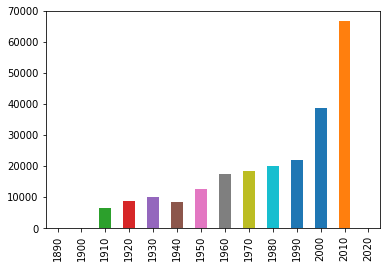

In [7]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

Wall time: 125 ms


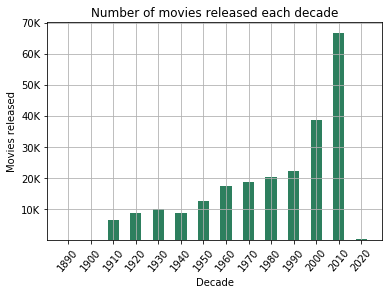

In [8]:
%%time
import matplotlib.pyplot as plt

start_decade = round(titles.year.min() / 10) * 10
finish_decade = round(titles.year.max() / 10) * 10

decades = []
released_movies = []

while start_decade < finish_decade:
    decades.append(start_decade)
    released_movies.append(titles.title[(titles.year >= start_decade) & (titles.year < (start_decade + 10))].count())
    start_decade = start_decade + 10
    
start_decade = round(titles.year.min() / 10) * 10

plt.title('Number of movies released each decade')
plt.xlabel("Decade")
plt.ylabel("Movies released")
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000], ['10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K', '90K', '100K'])
plt.grid(True)
plt.xticks(rotation=50)
plt.xticks(decades)

plt.bar(decades, released_movies, color = '#2d7f5e', width=5)
    

### Plot the number of "Hamlet" films made each decade.

Wall time: 477 ms


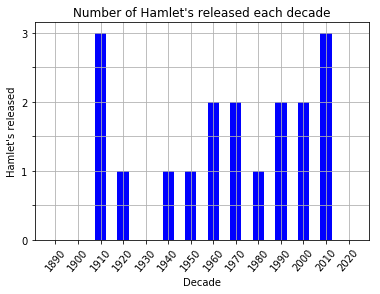

In [9]:
%%time
start_decade = round(titles.year.min() / 10) * 10
finish_decade = round(titles.year.max() / 10) * 10

decades = []
released_hamlets = []

while start_decade < finish_decade:
    decades.append(start_decade)
    released_hamlets.append(titles.title[(titles.title == "Hamlet") & (titles.year >= start_decade) & (titles.year < (start_decade + 10))].count())
    start_decade = start_decade + 10
start_decade = round(titles.year.min() / 10) * 10

plt.title("Number of Hamlet's released each decade")
plt.xlabel("Decade")
plt.ylabel("Hamlet's released")
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ['0', '', '1', '', '2', '', '3', '', '4'])
plt.grid(True)
plt.xticks(rotation=50)
plt.xticks(decades)

plt.bar(decades, released_hamlets, color = 'blue', width=5)

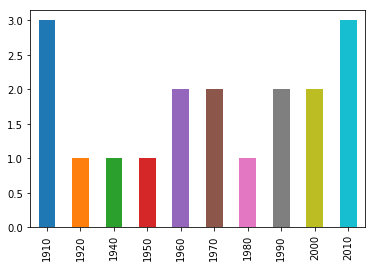

In [10]:
hamlets = titles[titles.title == "Hamlet"]
hamlets
(hamlets.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

Wall time: 10.1 s


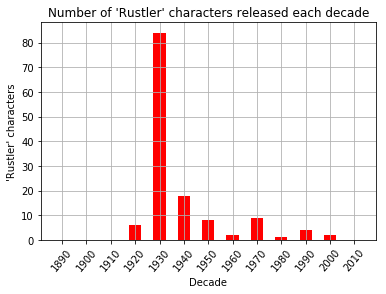

In [11]:
%%time
start_decade = round(cast.year.min() / 10) * 10
finish_decade = round(cast.year.max() / 10) * 10

decades = []
rustler_characters = []

while start_decade < finish_decade:
    decades.append(start_decade)
    rustler_characters.append(cast.type[(cast.character == "Rustler") & (cast.year >= start_decade) & (cast.year < (start_decade + 10))].count())
    start_decade = start_decade + 10
start_decade = round(cast.year.min() / 10) * 10

plt.title("Number of 'Rustler' characters released each decade")
plt.xlabel("Decade")
plt.ylabel("'Rustler' characters")
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ['0', '', '1', '', '2', '', '3', '', '4'])
plt.grid(True)
plt.xticks(rotation=50)
plt.xticks(decades)

plt.bar(decades, rustler_characters, color = 'red', width=5)

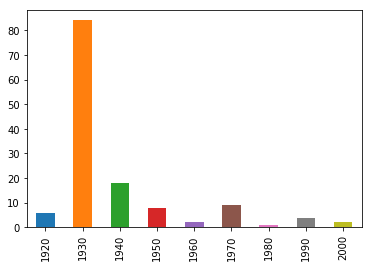

In [12]:
rustlers_nr = cast[cast.character == "Rustler"]
(rustlers_nr.year // 10 * 10).value_counts().sort_index().plot(kind='bar')   #não aparecem todas as décadas
# rustlers_nr.groupby(rustlers_nr.year // 10 * 10).size().plot(kind='bar', grid=True)   #tb pode ser com groupby

### Plot the number of "Hamlet" characters each decade.

Wall time: 32.5 s


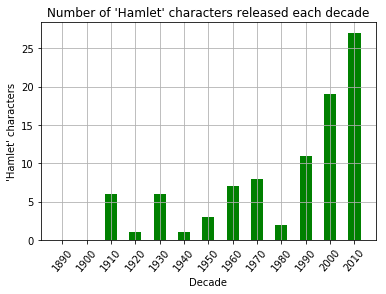

In [13]:
%%time
start_decade = round(cast.year.min() / 10) * 10
finish_decade = round(cast.year.max() / 10) * 10

decades = []
hamlet_characters = []

while start_decade < finish_decade:
    decades.append(start_decade)
    hamlet_characters.append(cast.type[(cast.character == "Hamlet") & (cast.year >= start_decade) & (cast.year < (start_decade + 10))].count())
    start_decade = start_decade + 10
start_decade = round(cast.year.min() / 10) * 10

plt.title("Number of 'Hamlet' characters released each decade")
plt.xlabel("Decade")
plt.ylabel("'Hamlet' characters")
# plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], ['0', '', '1', '', '2', '', '3', '', '4'])
plt.grid(True)
plt.xticks(rotation=50)
plt.xticks(decades)

plt.bar(decades, hamlet_characters, color = 'green', width=5)

### What are the 11 most common character names in movie history?

In [14]:
cast.character.value_counts().head(11)

Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [15]:
cast[cast.character == "Herself"]['name'].value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Hillary Clinton        6
Caroline Rhea          5
Kareena Kapoor         5
Bunny Yeager           5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [16]:
cast[cast.character == "Himself"]['name'].value_counts().head(10)

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
George W. Bush           23
Winston Churchill        23
Ron Jeremy               23
Benito Mussolini         22
Bill Clinton             20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [17]:
cast[cast.year == 1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [18]:
cast[cast.year == 1985].name.value_counts().head()

Shakti Kapoor    21
Mammootty        21
Sukumari         19
Mohanlal         15
Aruna Irani      15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<BarContainer object of 39 artists>

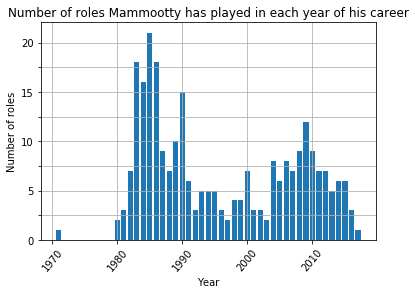

In [19]:
import matplotlib.pyplot as plt

c_to_roles = pd.DataFrame(cast[cast.name == "Mammootty"].year.value_counts())
corresp_year = list(set(cast[cast.name == "Mammootty"].year))

corresp_roles = []

for i in corresp_year:
    corresp_roles.append(c_to_roles.loc[i].year)

plt.title("Number of roles Mammootty has played in each year of his career")
plt.xlabel("Year")
plt.ylabel("Number of roles")
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], ['0', '', '5', '', '10', '', '15', '', '20'])
plt.grid(True)
plt.xticks(rotation=50)
# plt.xticks(decades)
plt.bar(corresp_year, corresp_roles)  



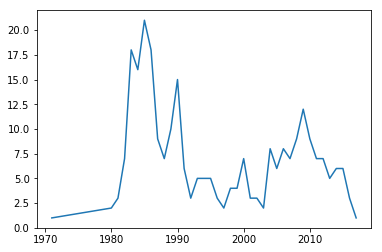

In [20]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [21]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [22]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Kid              6
Science Promo Cadet      5
Science Club Member      5
Science Reporter         5
Science                  4
Science teacher          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

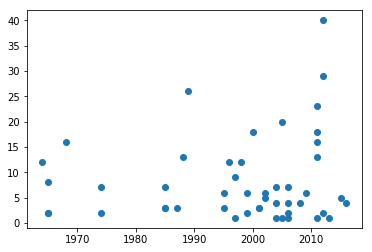

In [23]:
import matplotlib.pyplot as plt

jd = cast[cast.name == "Judi Dench"][['year', 'n']].sort_values('year')
jd
plt.scatter(jd['year'], jd['n'])


### Plot the n-values of Cary Grant's roles through his career.

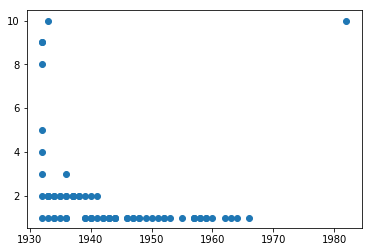

In [24]:
cg = cast[cast.name == "Cary Grant"][['year', 'n']].sort_values('year')
plt.scatter(cg['year'], cg['n'])

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

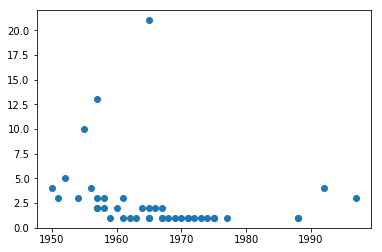

In [25]:
sp = cast[cast.name == "Sidney Poitier"][['year', 'n']].sort_values('year')
plt.scatter(sp['year'], sp['n'])

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [26]:
print("To actors,", cast[(cast.type == "actor") & (cast.n == 1) & (cast.year >= 1950) & (cast.year <= 1959)].type.count())
print("To actresses,", cast[(cast.type == "actress") & (cast.n == 1) & (cast.year >= 1950) & (cast.year <= 1959)].type.count())

To actors, 6599
To actresses, 2953


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
print("To actors,", cast[(cast.type == "actor") & (cast.n == 2) & (cast.year >= 1950) & (cast.year <= 1959)].type.count())
print("To actresses,", cast[(cast.type == "actress") & (cast.n == 2) & (cast.year >= 1950) & (cast.year <= 1959)].type.count())

To actors, 4550
To actresses, 4544
